In [14]:
#====================Import required libraries=============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import cv2 as cv
import os 
import sys
from numpy import asarray
#======================= For normalize the test value ===============
from keras.utils.np_utils import normalize
#====================== Printing the accurecy ================
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#=====================Aviod warnings =================
import warnings
warnings.filterwarnings('ignore')

#==================== Load the saved model =============
import pickle


In [15]:
#========== path of the Test data============= 
path='/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/test/Test_New_IMG/'

#read the csv file that contian the images name and its label 
test=pd.read_csv(r'/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/test/label.csv')

In [16]:
#store the images name in (image_name )
image_name=test['file_name'].to_list()
#store the labels of the images in (label_name ), which tell us the type of tumors 
label_name=test['label'].to_list()
test_labels = [] # Y trian store the informantion that 'if there a tumor or not ' 


In [17]:
#0 means (no_tumor), 1 means (have tumor) this will store in train_labels 

#==================== binary classification===========
for i in range(len(label_name)):  
    if label_name[i] == 'no_tumor':
        test_labels.append(0)
    else:
        test_labels.append(1)

In [18]:
#Print an examples for the two classes      
print("this image is", image_name[0] , label_name[0], "in Class: ", test_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", test_labels[1])



this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg meningioma_tumor in Class:  1


this image is IMAGE_0025.jpg pituitary_tumor in Class:  1


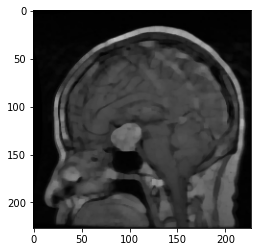

In [19]:

#Now I will read the file of the images and resize the images 
#then I will convert the images to array using np 

test_img = [] # X trian 
img_size= 227 # for using in image resize  

#len(image_name)
for i in range(len(image_name)):
    #print (i)
    image_11 = (path+'/'+image_name[i])
    read = cv.imread(image_11)
    resize = cv.resize(read,(img_size,img_size))
    test_img.append(resize)

test_img = np.array(test_img)
#Example of one image after resizing 
print("this image is", image_name[25] , label_name[25], "in Class: ", test_labels[25])
plt.imshow(test_img[25])

In [20]:
# here we can see how many data set in each class 
np.unique(test_labels)
pd.Series(test_labels).value_counts()

1    163
0     37
dtype: int64

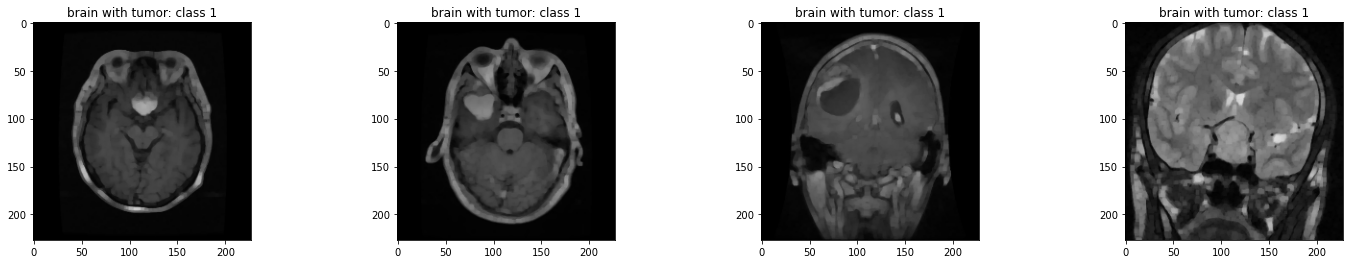

In [21]:
def Data_Visualization():
    c =0

    fig, subplots = plt.subplots(1, 4)
    fig.set_size_inches(25, 4)
    for j in range(len(test_labels)):
        if(c<4):
            if test_labels[j] == 0:
                subplots[j].imshow(test_img[j], cmap="gray")
                subplots[j].set_title("brain with NO tumor: class 0")
            elif test_labels[j] == 1:
                subplots[j].imshow(test_img[j], cmap="gray")
                subplots[j].set_title("brain with tumor: class 1")
        c=c+1


    return plt.show()


Data_Visualization()

In [23]:
#======== Reshape the images ========

#test_img = np.array(test_img).reshape(200, -1)
test_img=np.array(test_img)
test_labels=np.array(test_labels)
test_img=normalize(test_img, axis=1)

In [28]:
#=================== this fuction used fot load the saved models and print the test accurecy========
def Test(model_name):
    #==== Loading the model ======
    loaded_model = pickle.load(open(model_name, 'rb'))
    Y=loaded_model.predict(test_img)
    #=========== Printing Accurecy 
    print("Accuracy_test:",accuracy_score(test_labels,Y.round() ))
    
    #=========printing the Classificarion Report: 
    print(classification_report(test_labels, Y.round()))

In [29]:
print("=========== Test Result for CNN Task 1===========")
Test('DeepLearning_model_Task1.sav')




=========== Test Result for CNN Task 1===========
Accuracy_test: 0.955
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.98      0.96      0.97       163

    accuracy                           0.95       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.96      0.95      0.96       200

